In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## PHQ9 (923p)(8mr,8p)
The PHQ-9 is a valid measure of depression symptoms that are widely used for depression screening and treatment monitoring. Individuals report how often over the last 2 weeks they have experienced each of 9 core symptoms of major depression. This test was administered weekly from Week 0 to Week 4, then every two weeks until Week 12. It is a suitable tool for screening, diagnosing, and monitoring patients.

- Missing values (8 rows): Every **phq9_** column (NaN or 0.0) except **sum_phq9** and **phq9_1**

In [2]:
df_phq9 = pd.read_csv('data/phq9.csv')
df_phq9 = df_phq9.iloc[:, 3:]

## Location duration (315 participants)
- Missing values: Category: "none" == "undefined category" == "other"

In [3]:
df_location_duration = pd.read_csv('data/location_duration.csv')
df_location_duration = df_location_duration.iloc[:, 2:] # Remove the first 3 columns

print(df_location_duration['participant_id'].nunique(), "participants")
df_location_duration

315 participants


,participant_id,date,category,duration
0,EN00033,2016-08-13,home,5699.0
1,EN00033,2016-08-13,none,23460.0
2,EN00033,2016-08-14,home,63239.0
3,EN00033,2016-08-14,none,0.0
4,EN00033,2016-08-15,home,44220.0
...,...,...,...,...
32027,ES05073,2017-03-20,home,360.0
32028,ES05073,2017-03-20,none,2220.0
32029,ES05073,2017-03-21,none,0.0
32030,ES05073,2017-03-22,home,26160.0


#### Remove the participants whose PHQ9 is not available (64)

In [4]:
# Participants that are in df_location_duration but not in df_phq9
substraction = set(df_location_duration['participant_id']) - set(df_phq9['participant_id'])

# Remove participants from this set
df_location_duration = df_location_duration[~df_location_duration['participant_id'].isin(substraction)]
print(df_location_duration['participant_id'].nunique(), "participants")
df_location_duration

251 participants


,participant_id,date,category,duration
56,EN00035,2016-09-13,none,55979.0
57,EN00035,2016-09-14,none,56280.0
58,EN00039,2016-09-15,home,13620.0
59,EN00039,2016-09-15,none,9180.0
60,EN00039,2016-09-17,education,960.0
...,...,...,...,...
32027,ES05073,2017-03-20,home,360.0
32028,ES05073,2017-03-20,none,2220.0
32029,ES05073,2017-03-21,none,0.0
32030,ES05073,2017-03-22,home,26160.0


Result: 
- 32'032 rows -> 29'435 rows
- 315 participants -> 251 participants

#### Drop every row with category "none" or "undefined category" or "other"

In [5]:
# Count the unique categories
print(df_location_duration['category'].nunique(), "categories")
print(df_location_duration['category'].unique())

22 categories
['none' 'home' 'education' 'other' 'home_store' 'dining_out' 'park'
 'health' 'place_of_worship' 'personal_services' 'consumer_goods'
 'supermarket' 'finance' 'repair' 'lodging' 'entertainment' 'transit'
 'work' 'government_offices' 'automotive' 'place_of_mourning'
 'undefined category']


'none' == 'undefined category' == 'other' => just drop the rows

The ratios are computed only on measures not belonging to these categories

=> The remaining ratio is considered implicitly as the ratio of an other, undefined category

In [6]:
# Drop every row with category "none", "other", "undefined category"
df_location_duration_no_none = df_location_duration[
    (df_location_duration['category'] != 'none') &
    (df_location_duration['category'] != 'other') &
    (df_location_duration['category'] != 'undefined category')
]

print(df_location_duration_no_none['participant_id'].nunique(), "participants")
print(df_location_duration_no_none['category'].nunique(), "categories")
print(df_location_duration_no_none['category'].unique())
df_location_duration_no_none

240 participants
19 categories
['home' 'education' 'home_store' 'dining_out' 'park' 'health'
 'place_of_worship' 'personal_services' 'consumer_goods' 'supermarket'
 'finance' 'repair' 'lodging' 'entertainment' 'transit' 'work'
 'government_offices' 'automotive' 'place_of_mourning']


,participant_id,date,category,duration
58,EN00039,2016-09-15,home,13620.0
60,EN00039,2016-09-17,education,960.0
61,EN00039,2016-09-17,home,0.0
63,EN00039,2016-11-11,home,15120.0
64,EN00039,2016-11-13,home,30659.0
...,...,...,...,...
32021,ES05073,2017-03-16,home,31260.0
32023,ES05073,2017-03-17,home,20579.0
32025,ES05073,2017-03-18,home,58920.0
32027,ES05073,2017-03-20,home,360.0


Result:
- 29'435 rows -> 16'083 rows
- 251 participants -> 240 participants. 11 participants have only been detected in "other" category -> remove them
- 22 categories -> 19 categories

### Remove the rows where duration == 0.0

In [7]:
# Remove the rows with duration 0
df_location_duration_no_none = df_location_duration_no_none[df_location_duration_no_none['duration'] != 0]

print(df_location_duration_no_none['participant_id'].nunique(), "participants")
print(df_location_duration_no_none['category'].nunique(), "categories")
print(df_location_duration_no_none['category'].unique())
df_location_duration_no_none

240 participants
19 categories
['home' 'education' 'home_store' 'dining_out' 'park' 'health'
 'place_of_worship' 'personal_services' 'consumer_goods' 'supermarket'
 'finance' 'repair' 'lodging' 'entertainment' 'transit' 'work'
 'government_offices' 'automotive' 'place_of_mourning']


,participant_id,date,category,duration
58,EN00039,2016-09-15,home,13620.0
60,EN00039,2016-09-17,education,960.0
63,EN00039,2016-11-11,home,15120.0
64,EN00039,2016-11-13,home,30659.0
66,EN00039,2016-11-14,home,86399.0
...,...,...,...,...
32021,ES05073,2017-03-16,home,31260.0
32023,ES05073,2017-03-17,home,20579.0
32025,ES05073,2017-03-18,home,58920.0
32027,ES05073,2017-03-20,home,360.0


Result:
- 16'083 rows -> 12'077 rows
- same # participants
- same # categories

Number of dates per participant:
   - Min: 1
   - Max: 186
   - Mean: 43.44583333333333
   - Median: 38.0
participant_id
EN00039    48
EN00041    32
EN00046    49
EN00047    10
EN00052     3
           ..
ES05054    52
ES05059    22
ES05060    71
ES05062    64
ES05073    53
Name: date, Length: 240, dtype: int64


<AxesSubplot:xlabel='date'>

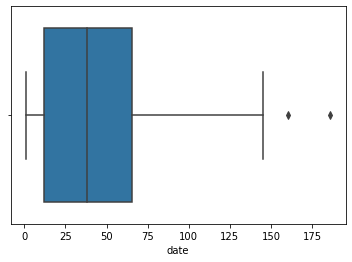

In [8]:
# Count the number of different dates at which each participant was studied
date_counts = df_location_duration_no_none.groupby('participant_id')['date'].nunique()

print("Number of dates per participant:")
print("   - Min:", date_counts.min())
print("   - Max:", date_counts.max())
print("   - Mean:", date_counts.mean())
print("   - Median:", date_counts.median())
print(date_counts)
sns.boxplot(x=date_counts)

Number of categories per participant per day:
  - min: 1
  - max: 4
  - mean: 1.1582430229212621
  - median: 1.0
1    8927
2    1359
3     132
4       9
Name: count, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Count'>

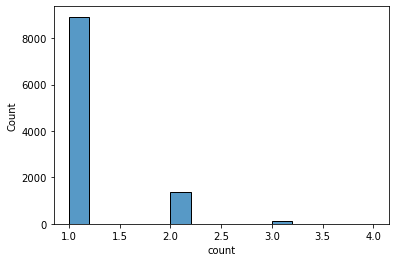

In [9]:
# Count the categories visited by each participant each day  
category_counts = df_location_duration_no_none.groupby(['participant_id', 'date']).size().reset_index().rename(columns={0:'count'}).sort_values('participant_id', ascending=True)

print("Number of categories per participant per day:")
print("  - min:", category_counts['count'].min())
print("  - max:", category_counts['count'].max())
print("  - mean:", category_counts['count'].mean())
print("  - median:", category_counts['count'].median())
print(category_counts['count'].value_counts())

sns.histplot(category_counts['count'])

### Ratio of the categories visited by each participant each day  

In [10]:
# Create a column for each unique category and put the duration spent in each category in each column for each (participant, day) pair
df_location_ratio = df_location_duration_no_none.pivot_table(index=['participant_id', 'date'], columns='category', values='duration', aggfunc=np.sum)
# Replace NaN with 0
df_location_ratio = df_location_ratio.fillna(0)
df_location_ratio

# Check all rows contain at least one non-zero value
assert len(df_location_ratio[df_location_ratio.sum(axis=1) == 0]) == 0

In [11]:
# Number of seconds in a day (86400)
seconds_in_day = 24*60*60

# Divide each category column by the number of seconds in a day
df_location_ratio = df_location_ratio.div(seconds_in_day)
df_location_ratio

category                   automotive  consumer_goods  dining_out  education  \
participant_id date                                                            
EN00039        2016-09-15         0.0             0.0         0.0   0.000000   
               2016-09-17         0.0             0.0         0.0   0.011111   
               2016-11-11         0.0             0.0         0.0   0.000000   
               2016-11-13         0.0             0.0         0.0   0.000000   
               2016-11-14         0.0             0.0         0.0   0.000000   
...                               ...             ...         ...        ...   
ES05073        2017-03-16         0.0             0.0         0.0   0.000000   
               2017-03-17         0.0             0.0         0.0   0.000000   
               2017-03-18         0.0             0.0         0.0   0.000000   
               2017-03-20         0.0             0.0         0.0   0.000000   
               2017-03-22         0.0             0.0         0.0   0.000000   

category                   entertainment  finance  government_offices  health  \
participant_id date                                                             
EN00039        2016-09-15            0.0      0.0                 0.0     0.0   
               2016-09-17            0.0      0.0                 0.0     0.0   
               2016-11-11            0.0      0.0                 0.0     0.0   
               2016-11-13            0.0      0.0                 0.0     0.0   
               2016-11-14            0.0      0.0                 0.0     0.0   
...                                  ...      ...                 ...     ...   
ES05073        2017-03-16            0.0      0.0                 0.0     0.0   
               2017-03-17            0.0      0.0                 0.0     0.0   
               2017-03-18            0.0      0.0                 0.0     0.0   
               2017-03-20            0.0      0.0                 0.0     0.0   
               2017-03-22            0.0      0.0                 0.0     0.0   

category                       home  home_store  lodging  park  \
participant_id date                                              
EN00039        2016-09-15  0.157639         0.0      0.0   0.0   
               2016-09-17  0.000000         0.0      0.0   0.0   
               2016-11-11  0.175000         0.0      0.0   0.0   
               2016-11-13  0.354850         0.0      0.0   0.0   
               2016-11-14  0.999988         0.0      0.0   0.0   
...                             ...         ...      ...   ...   
ES05073        2017-03-16  0.361806         0.0      0.0   0.0   
               2017-03-17  0.238183         0.0      0.0   0.0   
               2017-03-18  0.681944         0.0      0.0   0.0   
               2017-03-20  0.004167         0.0      0.0   0.0   
               2017-03-22  0.302778         0.0      0.0   0.0   

category                   personal_services  place_of_mourning  \
participant_id date                                               
EN00039        2016-09-15                0.0                0.0   
               2016-09-17                0.0                0.0   
               2016-11-11                0.0                0.0   
               2016-11-13                0.0                0.0   
               2016-11-14                0.0                0.0   
...                                      ...                ...   
ES05073        2017-03-16                0.0                0.0   
               2017-03-17                0.0                0.0   
               2017-03-18                0.0                0.0   
               2017-03-20                0.0                0.0   
               2017-03-22                0.0                0.0   

category                   place_of_worship  repair  supermarket  transit  \
participant_id date                                                         
EN00039        2016-

#### Most visited categories

home                  9008
work                   760
health                 138
dining_out              73
lodging                 61
entertainment           47
consumer_goods          46
finance                 44
repair                  39
supermarket             37
education               30
home_store              30
automotive              24
place_of_worship        22
personal_services       18
government_offices      18
transit                 17
park                    13
place_of_mourning        2
dtype: int64


<AxesSubplot:ylabel='Count'>

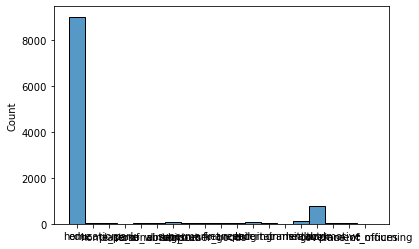

In [12]:
# For each (participant, day) pair, print the category with the highest ratio
df_location_ratio_max = df_location_ratio.idxmax(axis=1)
print(df_location_ratio_max.value_counts())
sns.histplot(df_location_ratio_max)


Summary: stay at home

#### Days with many locations

In [13]:
# Days where participant visited more than one location (2, 3 or 4)
df_many_locations = df_location_ratio.loc[(df_location_ratio.iloc[:, 2:] > 0).sum(axis=1) > 1]
df_many_locations

category                   automotive  consumer_goods  dining_out  education  \
participant_id date                                                            
EN00039        2016-11-28         0.0             0.0    0.000000        0.0   
               2016-12-17         0.0             0.0    0.011806        0.0   
EN00046        2016-09-28         0.0             0.0    0.000000        0.0   
               2016-10-04         0.0             0.0    0.006944        0.0   
               2016-10-25         0.0             0.0    0.000000        0.0   
...                               ...             ...         ...        ...   
ES05060        2017-03-10         0.0             0.0    0.000000        0.0   
               2017-03-23         0.0             0.0    0.000000        0.0   
ES05062        2017-01-16         0.0             0.0    0.000000        0.0   
               2017-03-05         0.0             0.0    0.009722        0.0   
               2017-03-31         0.0             0.0    0.017361        0.0   

category                   entertainment   finance  government_offices  \
participant_id date                                                      
EN00039        2016-11-28            0.0  0.000000                 0.0   
               2016-12-17            0.0  0.000000                 0.0   
EN00046        2016-09-28            0.0  0.000000                 0.0   
               2016-10-04            0.0  0.000000                 0.0   
               2016-10-25            0.0  0.000000                 0.0   
...                                  ...       ...                 ...   
ES05060        2017-03-10            0.0  0.000000                 0.0   
               2017-03-23            0.0  0.000000                 0.0   
ES05062        2017-01-16            0.0  0.041667                 0.0   
               2017-03-05            0.0  0.000000                 0.0   
               2017-03-31            0.0  0.000000                 0.0   

category                     health      home  home_store   lodging  park  \
participant_id date                                                         
EN00039        2016-11-28  0.000000  0.077083      0.1125  0.000000   0.0   
               2016-12-17  0.000000  0.071516      0.0000  0.000000   0.0   
EN00046        2016-09-28  0.010417  0.085405      0.0000  0.000000   0.0   
               2016-10-04  0.000000  0.124988      0.0000  0.000000   0.0   
               2016-10-25  0.020139  0.156238      0.0000  0.000000   0.0   
...                             ...       ...         ...       ...   ...   
ES05060        2017-03-10  0.000000  0.386100      0.0000  0.073611   0.0   
               2017-03-23  0.016667  0.900683      0.0000  0.000000   0.0   
ES05062        2017-01-16  0.000000  0.468056      0.0000  0.000000   0.0   
               2017-03-05  0.000000  0.226377      0.0000  0.000000   0.0   
               2017-03-31  0.000000  0.031933      0.0000  0.000000   0.0   

category                   personal_services  place_of_mourning  \
participant_id date                                               
EN00039        2016-11-28                0.0                0.0   
               2016-12-17                0.0                0.0   
EN00046        2016-09-28                0.0                0.0   
               2016-10-04                0.0                0.0   
               2016-10-25                0.0                0.0   
...                                      ...                ...   
ES05060        2017-03-10                0.0                0.0   
               2017-03-23                0.0                0.0   
ES05062        2017-01-16                0.0                0.0   
               2017-03-05                0.0                0.0   
               2017-03-31                0.0                0.0   

category                   place_of_worship  repair  supermarket  transit  \
participant_id date                          

Observation: 88.6% of the measurements (12000) have been done in only one (defined) location

participant_id  date      
EN00039         2016-09-15    0.157639
                2016-09-17    0.011111
                2016-11-11    0.175000
                2016-11-13    0.354850
                2016-11-14    0.999988
                                ...   
ES05073         2017-03-16    0.361806
                2017-03-17    0.238183
                2017-03-18    0.681944
                2017-03-20    0.004167
                2017-03-22    0.302778
Length: 10427, dtype: float64


<AxesSubplot:ylabel='Count'>

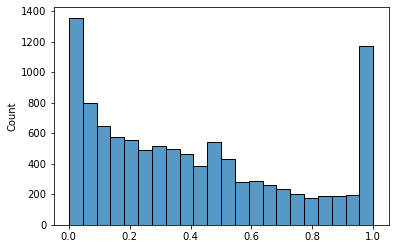

In [14]:
df_location_ratio_sum = df_location_ratio.sum(axis=1)

# Print for each the sum of each category column
print(df_location_ratio_sum)
# Distribution of the sums
sns.histplot(df_location_ratio_sum)


Location ratio sum per participant per day:
  - min: 0.0006828703703703705
  - max: 0.999988425925926
  - mean: 0.40867399983660646
  - median: 0.34166666666666673


<AxesSubplot:>

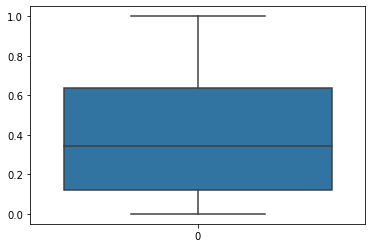

In [15]:
print("Location ratio sum per participant per day:")
print("  - min:", df_location_ratio_sum.min())
print("  - max:", df_location_ratio_sum.max())
print("  - mean:", df_location_ratio_sum.mean())
print("  - median:", df_location_ratio_sum.median())
sns.boxplot(df_location_ratio_sum)

Observation: There lacks a lot of info about the daily routine

Combine with mobility features to have more info

#### Days with lot a info

In [16]:
df_lot_info = df_location_ratio[df_location_ratio_sum == df_location_ratio_sum.max()]
df_lot_info

category                   automotive  consumer_goods  dining_out  education  \
participant_id date                                                            
EN00039        2016-11-14         0.0             0.0         0.0        0.0   
               2016-12-09         0.0             0.0         0.0        0.0   
               2016-12-10         0.0             0.0         0.0        0.0   
               2016-12-15         0.0             0.0         0.0        0.0   
               2016-12-18         0.0             0.0         0.0        0.0   
...                               ...             ...         ...        ...   
ES05060        2017-02-24         0.0             0.0         0.0        0.0   
               2017-03-17         0.0             0.0         0.0        0.0   
ES05062        2017-01-23         0.0             0.0         0.0        0.0   
               2017-03-06         0.0             0.0         0.0        0.0   
ES05073        2017-03-12         0.0             0.0         0.0        0.0   

category                   entertainment  finance  government_offices  health  \
participant_id date                                                             
EN00039        2016-11-14            0.0      0.0                 0.0     0.0   
               2016-12-09            0.0      0.0                 0.0     0.0   
               2016-12-10            0.0      0.0                 0.0     0.0   
               2016-12-15            0.0      0.0                 0.0     0.0   
               2016-12-18            0.0      0.0                 0.0     0.0   
...                                  ...      ...                 ...     ...   
ES05060        2017-02-24            0.0      0.0                 0.0     0.0   
               2017-03-17            0.0      0.0                 0.0     0.0   
ES05062        2017-01-23            0.0      0.0                 0.0     0.0   
               2017-03-06            0.0      0.0                 0.0     0.0   
ES05073        2017-03-12            0.0      0.0                 0.0     0.0   

category                       home  home_store  lodging  park  \
participant_id date                                              
EN00039        2016-11-14  0.999988         0.0      0.0   0.0   
               2016-12-09  0.999988         0.0      0.0   0.0   
               2016-12-10  0.999988         0.0      0.0   0.0   
               2016-12-15  0.999988         0.0      0.0   0.0   
               2016-12-18  0.999988         0.0      0.0   0.0   
...                             ...         ...      ...   ...   
ES05060        2017-02-24  0.999988         0.0      0.0   0.0   
               2017-03-17  0.999988         0.0      0.0   0.0   
ES05062        2017-01-23  0.999988         0.0      0.0   0.0   
               2017-03-06  0.999988         0.0      0.0   0.0   
ES05073        2017-03-12  0.999988         0.0      0.0   0.0   

category                   personal_services  place_of_mourning  \
participant_id date                                               
EN00039        2016-11-14                0.0                0.0   
               2016-12-09                0.0                0.0   
               2016-12-10                0.0                0.0   
               2016-12-15                0.0                0.0   
               2016-12-18                0.0                0.0   
...                                      ...                ...   
ES05060        2017-02-24                0.0                0.0   
               2017-03-17                0.0                0.0   
ES05062        2017-01-23                0.0                0.0   
               2017-03-06                0.0                0.0   
ES05073        2017-03-12                0.0                0.0   

category                   place_of_worship  repair  supermarket  transit  \
participant_id date                                                         
EN00039        2016-

In [17]:
# Print the columns with a nonzero value
df_lot_info.loc[:, df_lot_info.sum(axis=0) > 0]

category                       home  supermarket  work
participant_id date                                   
EN00039        2016-11-14  0.999988          0.0   0.0
               2016-12-09  0.999988          0.0   0.0
               2016-12-10  0.999988          0.0   0.0
               2016-12-15  0.999988          0.0   0.0
               2016-12-18  0.999988          0.0   0.0
...                             ...          ...   ...
ES05060        2017-02-24  0.999988          0.0   0.0
               2017-03-17  0.999988          0.0   0.0
ES05062        2017-01-23  0.999988          0.0   0.0
               2017-03-06  0.999988          0.0   0.0
ES05073        2017-03-12  0.999988          0.0   0.0

[1046 rows x 3 columns]

In [18]:
# Rows where 'supermarket' not zero
df_lot_info[df_lot_info['supermarket'] > 0]

,category,automotive,consumer_goods,dining_out,education,entertainment,finance,government_offices,health,home,home_store,lodging,park,personal_services,place_of_mourning,place_of_worship,repair,supermarket,transit,work
participant_id,date,,,,,,,,,,,,,,,,,,,
EN00416,2017-03-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999988,0.0,0.0


??? It spent the whole day in a supermarket? -> remove it

In [19]:
df_lot_info[df_lot_info['work'] > 0]

category                   automotive  consumer_goods  dining_out  education  \
participant_id date                                                            
EN00073        2016-11-02         0.0             0.0         0.0        0.0   
               2016-11-03         0.0             0.0         0.0        0.0   
EN00136        2016-09-24         0.0             0.0         0.0        0.0   

category                   entertainment  finance  government_offices  health  \
participant_id date                                                             
EN00073        2016-11-02            0.0      0.0                 0.0     0.0   
               2016-11-03            0.0      0.0                 0.0     0.0   
EN00136        2016-09-24            0.0      0.0                 0.0     0.0   

category                   home  home_store  lodging  park  personal_services  \
participant_id date                                                             
EN00073        2016-11-02   0.0         0.0      0.0   0.0                0.0   
               2016-11-03   0.0         0.0      0.0   0.0                0.0   
EN00136        2016-09-24   0.0         0.0      0.0   0.0                0.0   

category                   place_of_mourning  place_of_worship  repair  \
participant_id date                                                      
EN00073        2016-11-02                0.0               0.0     0.0   
               2016-11-03                0.0               0.0     0.0   
EN00136        2016-09-24                0.0               0.0     0.0   

category                   supermarket  transit      work  
participant_id date                                        
EN00073        2016-11-02          0.0      0.0  0.999988  
               2016-11-03          0.0      0.0  0.999988  
EN00136        2016-09-24          0.0      0.0  0.999988

??? It spent the whole day at work?

Summary: 
- Almost all of them have most of the time at home (=> in fact 100% ?)
- Outliers: supermarket and work

#### Days with few info

In [20]:
df_few_info = df_location_ratio[df_location_ratio_sum == df_location_ratio_sum.min()]
df_few_info

,category,automotive,consumer_goods,dining_out,education,entertainment,finance,government_offices,health,home,home_store,lodging,park,personal_services,place_of_mourning,place_of_worship,repair,supermarket,transit,work
participant_id,date,,,,,,,,,,,,,,,,,,,
EN00147,2016-09-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EN00295,2016-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EN00554,2017-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EN00588,2016-12-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Print the columns with a nonzero value
df_few_info.loc[:, df_few_info.sum(axis=0) > 0]

,category,home
participant_id,date,
EN00147,2016-09-22,0.000683
EN00295,2016-09-30,0.000683
EN00554,2017-01-03,0.000683
EN00588,2016-12-20,0.000683


Summary: all of them only measures at home (=> in fact 100% ?)

## Passive mobility features (319p)(492mr, 158p)

- Missing values:
    - **location_variance** (NaN: "(nothing)")

In [54]:
df_passive_mobility_features = pd.read_csv('data/passive_mobility_features_brighten_v2.csv')
df_passive_mobility_features = df_passive_mobility_features.iloc[:, 3:]

print(df_passive_mobility_features['participant_id'].nunique(), "participants")
df_passive_mobility_features

319 participants


,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
0,EN00538,2016-11-14,0,True,6284.6,0.0,0.0,5420.4,8,0.783,0.0,9.733,0.000,11.750,6.833,1.517,-5.261
1,EN00538,2016-11-15,0,True,15960.1,0.0,0.0,7120.3,24,1.733,0.0,0.133,0.000,20.133,3.833,2.117,-5.440
2,EN00538,2016-11-16,0,True,4359.7,0.0,9656.3,3456.6,12,0.567,0.0,0.167,0.183,11.767,4.817,0.917,-4.209
3,EN00538,2016-11-17,0,True,22387.9,0.0,1143.0,9809.7,16,2.583,0.0,0.200,0.050,25.883,17.900,2.467,-5.122
4,EN00538,2016-11-18,0,True,45277.7,0.0,22332.9,5856.4,24,5.500,0.0,0.167,0.550,16.467,3.967,1.467,-4.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16785,EN05215,2016-11-25,1,False,10737.4,0.0,2685.7,0.0,2,0.783,0.0,5.567,0.083,0.000,0.000,0.000,-3.984
16786,EN05215,2016-11-26,2,True,3794.3,0.0,0.0,1844.3,7,0.350,0.0,2.683,0.000,10.717,4.667,0.383,-4.763
16787,EN05215,2016-11-27,2,True,1949.1,0.0,0.0,241.8,5,0.300,0.0,14.083,0.000,20.683,20.000,0.083,-5.478
16788,EN05215,2016-11-28,2,False,3113.3,0.0,5350.6,1241.7,5,0.350,0.0,0.250,0.183,27.117,27.117,0.267,-4.361


#### Remove the participants whose PHQ9 is not available (68)

In [55]:
# Participants that are in df_location_duration but not in df_phq9
substraction = set(df_passive_mobility_features['participant_id']) - set(df_phq9['participant_id'])

# Remove participants from this set
df_passive_mobility_features = df_passive_mobility_features[~df_passive_mobility_features['participant_id'].isin(substraction)]
assert set(df_passive_mobility_features['participant_id']) == set(df_location_duration['participant_id'])

print(df_passive_mobility_features['participant_id'].nunique(), "participants")
df_passive_mobility_features

251 participants


,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
0,EN00538,2016-11-14,0,True,6284.6,0.0,0.0,5420.4,8,0.783,0.0,9.733,0.000,11.750,6.833,1.517,-5.261
1,EN00538,2016-11-15,0,True,15960.1,0.0,0.0,7120.3,24,1.733,0.0,0.133,0.000,20.133,3.833,2.117,-5.440
2,EN00538,2016-11-16,0,True,4359.7,0.0,9656.3,3456.6,12,0.567,0.0,0.167,0.183,11.767,4.817,0.917,-4.209
3,EN00538,2016-11-17,0,True,22387.9,0.0,1143.0,9809.7,16,2.583,0.0,0.200,0.050,25.883,17.900,2.467,-5.122
4,EN00538,2016-11-18,0,True,45277.7,0.0,22332.9,5856.4,24,5.500,0.0,0.167,0.550,16.467,3.967,1.467,-4.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16785,EN05215,2016-11-25,1,False,10737.4,0.0,2685.7,0.0,2,0.783,0.0,5.567,0.083,0.000,0.000,0.000,-3.984
16786,EN05215,2016-11-26,2,True,3794.3,0.0,0.0,1844.3,7,0.350,0.0,2.683,0.000,10.717,4.667,0.383,-4.763
16787,EN05215,2016-11-27,2,True,1949.1,0.0,0.0,241.8,5,0.300,0.0,14.083,0.000,20.683,20.000,0.083,-5.478
16788,EN05215,2016-11-28,2,False,3113.3,0.0,5350.6,1241.7,5,0.350,0.0,0.250,0.183,27.117,27.117,0.267,-4.361


Result: 
- 16'790 rows -> 15'356 rows
- 319 participants -> 251 participants and has exactly the same participants as in location_duration

In [57]:
# All the (participant_id, date) pairs in df_location_ratio
pairs_1 = set(df_location_ratio.index)
print(len(pairs_1))

# All the (participant_id, dt_passive) pairs in df_passive_mobility_features
pairs_2 = set(df_passive_mobility_features[['participant_id', 'dt_passive']].itertuples(index=False, name=None))
print(len(pairs_2))

pairs_1_not_2 = pairs_1 - pairs_2
print("Number of (participant_id, date) pairs in df_location_ratio but not in df_passive_mobility_features:", len(pairs_1_not_2))
pairs_2_not_1 = pairs_2 - pairs_1
print("Number of (participant_id, dt_passive) pairs in df_passive_mobility_features but not in df_location_ratio:", len(pairs_2_not_1))
# Intersection
pairs_1_and_2 = pairs_1 & pairs_2
print("Number of (participant_id, date) pairs in df_location_ratio and in df_passive_mobility_features:", len(pairs_1_and_2))

10427
15356
Number of (participant_id, date) pairs in df_location_ratio but not in df_passive_mobility_features: 42
Number of (participant_id, dt_passive) pairs in df_passive_mobility_features but not in df_location_ratio: 4971
Number of (participant_id, date) pairs in df_location_ratio and in df_passive_mobility_features: 10385


In [44]:
pairs = pairs_1[~pairs_1.index.isin(pairs_2.index)]
print("The number of (participant_id, dt_passive) pairs that are in df_location_ratio but not in df_passive_mobility_features is", len(pairs))
print(len(pairs)) # 83 

# Print the (participant_id, dt_passive) pairs that are in df_passive_mobility_features but not in df_location_duration
pairs = pairs_2[~pairs_2.index.isin(pairs_1.index)]
print(len(pairs)) # 456

# Print the (participant_id, dt_passive) pairs that are in df_location_duration_ and in df_passive_mobility_features
intersection = pairs_1[pairs_1.index.isin(pairs_2.index)]
print(len(intersection)) # 16334

15014 16790
70
1846
14944


In [26]:
# Print a row that is in df_passive_mobility_features but not in df_location_duration
# In location_duration: is category "none" for 2220 seconds
df_passive_mobility_features[
    (df_passive_mobility_features['participant_id'] == 'ES05073') &
    (df_passive_mobility_features['dt_passive'] == '2017-03-21')
]

,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
15792,ES05073,2017-03-21,8,False,0.0,0.0,0.0,0.0,2,0.0,0.0,23.383,0.0,0.4,0.4,0.0,-6.124


In [27]:
df_location_duration[
    (df_location_duration['participant_id'] == 'EN00036') &
    (df_location_duration['date'] == '2016-09-13')
]

,participant_id,date,category,duration


In [28]:
df_location_duration[
    (df_location_duration['participant_id'] == 'EN00040') &
    (df_location_duration['date'] == '2016-08-23')
]

,participant_id,date,category,duration
160,EN00040,2016-08-23,none,79680.0
161,EN00040,2016-08-23,other,5699.0


In [29]:
# NOTE: One row = One (participant, day) pair => 16790 (participant, day) pairs

In [30]:
# Print the name of the columns who have missing values
print(df_passive_mobility_features.columns[df_passive_mobility_features.isnull().any()])

# Print the rows who have missing values 
df_passive_mobility_features_miss = df_passive_mobility_features[df_passive_mobility_features.isnull().any(axis=1)]
print(len(df_passive_mobility_features_miss), "missing rows,", df_passive_mobility_features_miss['participant_id'].nunique(), "missing participants")
df_passive_mobility_features_miss.sort_values(by=['participant_id', 'week'])

Index(['location_variance'], dtype='object')
492 missing rows, 158 missing participants


,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
7308,EN00033,2016-09-10,4,False,0.0,0.0,0.0,0.0,1,0.0,0.0,5.400,0.0,9.400,9.4,0.0,NaN
10810,EN00036,2016-09-13,4,False,0.0,0.0,0.0,0.0,1,0.0,0.0,16.783,0.0,0.000,0.0,0.0,NaN
2654,EN00039,2016-11-29,15,False,0.0,0.0,0.0,0.0,1,0.0,0.0,7.217,0.0,0.000,0.0,0.0,NaN
2657,EN00039,2016-12-05,16,False,0.0,0.0,0.0,0.0,1,0.0,0.0,5.400,0.0,0.000,0.0,0.0,NaN
2680,EN00039,2017-01-02,20,False,0.0,0.0,0.0,0.0,1,0.0,0.0,22.583,0.0,0.000,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,ES05054,2017-03-23,10,False,0.0,0.0,0.0,0.0,1,0.0,0.0,12.983,0.0,9.917,0.0,0.0,NaN
9316,ES05054,2017-04-09,13,False,0.0,0.0,0.0,0.0,1,0.0,0.0,16.267,0.0,14.517,0.0,0.0,NaN
9322,ES05054,2017-04-17,14,False,0.0,0.0,0.0,0.0,1,0.0,0.0,4.650,0.0,0.000,0.0,0.0,NaN
12713,ES05060,2017-02-02,3,False,0.0,0.0,0.0,0.0,1,0.0,0.0,17.133,0.0,12.883,0.0,0.0,NaN


In [31]:
loc_duration_pairs = df_location_ratio.groupby(['participant_id', 'date']).size()
mobility_miss_pairs = df_passive_mobility_features_miss.groupby(['participant_id', 'dt_passive']).size()
# Print the (participant_id, dt_passive) pairs that are in df_location_ratio and in missed df_passive_mobility_features
intersection = loc_duration_pairs[loc_duration_pairs.index.isin(mobility_miss_pairs.index)]
print(intersection)

participant_id  date      
EN00057         2016-09-15    1
                2016-11-14    1
EN00065         2016-08-27    1
EN00068         2016-10-06    1
EN00080         2016-09-20    1
                             ..
EN05359         2017-03-08    1
ES00052         2017-02-09    1
ES05030         2016-11-19    1
ES05054         2017-01-25    1
ES05060         2017-02-02    1
Length: 127, dtype: int64


In [32]:
participant_id  = 'EN00057'
date = '2016-11-14'

#print(df_location_duration[
#    (df_location_duration['participant_id'] == participant_id) &
#    (df_location_duration['date'] == date)
#])
#print(df_location_ratio.loc[(participant_id, date)])

# find the non-zero value in the row
category = df_location_ratio.loc[(participant_id, date)].loc[df_location_ratio.loc[(participant_id, date)] > 0]
#print(list(category.keys()))
print(category.values[0])

0.5437384259259259


In [33]:
categories = set()
for pair in intersection.index:
    participant_id = pair[0]
    date = pair[1]
    category = df_location_ratio.loc[(participant_id, date)].loc[df_location_ratio.loc[(participant_id, date)] > 0]
    print(list(category.keys()))
    print(category.values)

['home']
[0.54165509]
['home']
[0.54373843]
['home']
[0.99998843]
['home']
[0.96319444]
['home']
[0.99998843]
['home']
[0.44373843]
['home']
[0.16736111]
['home']
[0.62777778]
['home']
[0.33958333]
['home']
[0.45833333]
['home']
[0.15693287]
['home']
[0.46111111]
['home']
[0.99998843]
['home']
[0.44652778]
['home']
[0.99998843]
['home']
[0.99998843]
['home']
[0.49375]
['home']
[0.5590162]
['home']
[0.99998843]
['home']
[0.9902662]
['home']
[0.1590162]
['home']
[0.47361111]
['home']
[0.45833333]
['home']
[0.37291667]
['home']
[0.99998843]
['home']
[0.46180556]
['home']
[0.48263889]
['home']
[0.54652778]
['home']
[0.54165509]
['home']
[0.41248843]
['home']
[0.4625]
['home']
[0.66527778]
['home']
[0.54096065]
['home']
[0.60972222]
['home']
[0.45555556]
['home']
[0.39236111]
['home']
[0.35625]
['home']
[0.42359954]
['home']
[0.69305556]
['home']
[0.26111111]
['home']
[0.49859954]
['home']
[0.30277778]
['home']
[0.37498843]
['home']
[0.70277778]
['home']
[0.72916667]
['home']
[0.46805556]
[

Observation: 
All rows where location = NaN have "home" as sole category. We can compare "hours stationary" and "duration" to deduce they spent the whole day at home if equal.


Observation: 
- All have distances == 0.0
- But rows that have **location_variance** != 0.0 may also have distances == 0.0

=> the distances have been rounded down before being written on csv, and the distances of missing are truly 0 (log = \infty) -> stay at home! -> transform to 0.0

In [34]:
df_passive_mobility_features_zero = df_passive_mobility_features[
    (df_passive_mobility_features['distance_active'] == 0.0) &
    (df_passive_mobility_features['distance_high_speed_transportation'] == 0.0) &
    (df_passive_mobility_features['distance_powered_vehicle'] == 0.0) & 
    (df_passive_mobility_features['distance_walking'] == 0.0)
].sort_values(by=['participant_id', 'dt_passive'])
df_passive_mobility_features_zero

,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
7282,EN00033,2016-08-14,0,False,0.0,0.0,0.0,0.0,3,0.0,0.0,15.450,0.0,21.683,21.683,0.0,-4.417
7283,EN00033,2016-08-15,0,False,0.0,0.0,0.0,0.0,1,0.0,0.0,14.583,0.0,12.283,12.283,0.0,-10.260
7295,EN00033,2016-08-28,2,False,0.0,0.0,0.0,0.0,2,0.0,0.0,5.950,0.0,10.833,10.833,0.0,-4.986
7296,EN00033,2016-08-29,2,False,0.0,0.0,0.0,0.0,2,0.0,0.0,3.850,0.0,0.767,0.767,0.0,-4.627
7301,EN00033,2016-09-03,3,False,0.0,0.0,0.0,0.0,2,0.0,0.0,17.233,0.0,22.100,22.100,0.0,-4.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15749,ES05073,2017-02-04,2,False,0.0,0.0,0.0,0.0,9,0.0,0.0,19.900,0.0,8.633,0.000,0.0,-10.188
15752,ES05073,2017-02-07,2,False,0.0,0.0,0.0,0.0,8,0.0,0.0,3.033,0.0,11.667,4.683,0.0,-6.372
15756,ES05073,2017-02-11,3,False,0.0,0.0,0.0,0.0,13,0.0,0.0,14.883,0.0,23.100,0.000,0.0,-9.146
15792,ES05073,2017-03-21,8,False,0.0,0.0,0.0,0.0,2,0.0,0.0,23.383,0.0,0.400,0.400,0.0,-6.124


In [35]:
# All rows with location_variance nonzero

df_passive_mobility_features_nonzero = df_passive_mobility_features_zero[
    df_passive_mobility_features_zero['location_variance'].notnull()
]
df_passive_mobility_features_nonzero.sort_values(by=['location_variance'])['location_variance']

13472   -32.578
16578   -31.885
860     -31.885
16577   -31.885
6142    -31.885
          ...  
12387    -3.378
2330     -3.328
10983    -3.002
9435     -2.457
9057     -2.323
Name: location_variance, Length: 2046, dtype: float64

In [36]:
df_passive_mobility_features_miss[df_passive_mobility_features_miss['hours_stationary_nhw'] == 0.0]

,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
202,EN00588,2016-11-29,2,False,0.0,0.0,0.0,0.0,1,0.0,0.0,19.333,0.0,0.000,0.0,0.0,NaN
278,EN05359,2017-03-08,5,False,0.0,0.0,0.0,0.0,1,0.0,0.0,15.533,0.0,11.533,0.0,0.0,NaN
279,EN00684,2016-12-04,0,False,0.0,0.0,0.0,0.0,1,0.0,0.0,15.800,0.0,13.883,0.0,0.0,NaN
310,EN00684,2017-01-04,4,False,0.0,0.0,0.0,0.0,1,0.0,0.0,11.100,0.0,11.100,0.0,0.0,NaN
322,EN00684,2017-01-16,6,False,0.0,0.0,0.0,0.0,1,0.0,0.0,16.233,0.0,14.783,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,EN05092,2017-01-03,17,False,0.0,0.0,0.0,0.0,1,0.0,0.0,6.117,0.0,11.117,0.0,0.0,NaN
16612,EN05023,2016-09-22,4,False,0.0,0.0,0.0,0.0,1,0.0,0.0,12.533,0.0,0.000,0.0,0.0,NaN
16613,EN05023,2016-09-26,4,False,0.0,0.0,0.0,0.0,1,0.0,0.0,9.583,0.0,0.000,0.0,0.0,NaN
16709,EN00132,2016-09-11,1,False,0.0,0.0,0.0,0.0,1,0.0,0.0,17.883,0.0,0.000,0.0,0.0,NaN
